In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from sklearn import datasets, linear_model

In [4]:
import pandas as pd

In [5]:
# Load Data
df = pd.read_csv("Data/Housing.csv")

In [6]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [7]:
# Extract and Reshape Data.
Y = df['price']
X = df['lotsize']

X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)

In [8]:
# Split into training and test data.
X_train = X[:-250]
X_test = X[-250:]

Y_train = Y[:-250]
Y_test = Y[-250:]

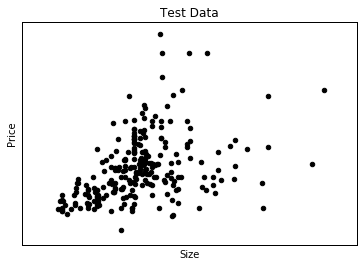

In [9]:
#Plot and observe Price varying with Size.
plt.scatter(X_test, Y_test, color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
plt.show()

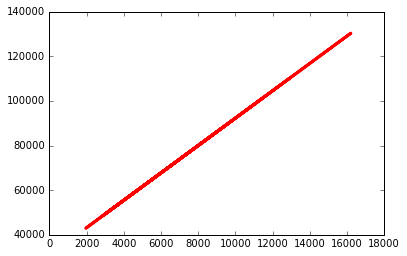

In [10]:
# Create a Linear Regression Model, Train it with Test Data, Predict on Test Data.
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
plt.plot(X_test, regr.predict(X_test), color='red', linewidth=3)

In [12]:
# Use model to predict price for a single lot size.
regr.predict(5000)

array([[ 61622.51528266]])

In [17]:
# Use model to predict price for a range of lot sizes.
for lotSize in range(8000,8010):
    print(regr.predict(lotSize))

[[ 80018.1006161]]
[[ 80024.23247787]]
[[ 80030.36433965]]
[[ 80036.49620143]]
[[ 80042.62806321]]
[[ 80048.75992499]]
[[ 80054.89178676]]
[[ 80061.02364854]]
[[ 80067.15551032]]
[[ 80073.2873721]]


Clustering

In [18]:
from matplotlib.colors import ListedColormap

In [19]:
from sklearn import neighbors, datasets

In [20]:
iris = datasets.load_iris()

In [42]:
X = iris.data[:,:2]
y = iris.target

In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
X[:,0]

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

In [46]:
X[:,1]

array([ 3.5,  3. ,  3.2,  3.1,  3.6,  3.9,  3.4,  3.4,  2.9,  3.1,  3.7,
        3.4,  3. ,  3. ,  4. ,  4.4,  3.9,  3.5,  3.8,  3.8,  3.4,  3.7,
        3.6,  3.3,  3.4,  3. ,  3.4,  3.5,  3.4,  3.2,  3.1,  3.4,  4.1,
        4.2,  3.1,  3.2,  3.5,  3.1,  3. ,  3.4,  3.5,  2.3,  3.2,  3.5,
        3.8,  3. ,  3.8,  3.2,  3.7,  3.3,  3.2,  3.2,  3.1,  2.3,  2.8,
        2.8,  3.3,  2.4,  2.9,  2.7,  2. ,  3. ,  2.2,  2.9,  2.9,  3.1,
        3. ,  2.7,  2.2,  2.5,  3.2,  2.8,  2.5,  2.8,  2.9,  3. ,  2.8,
        3. ,  2.9,  2.6,  2.4,  2.4,  2.7,  2.7,  3. ,  3.4,  3.1,  2.3,
        3. ,  2.5,  2.6,  3. ,  2.6,  2.3,  2.7,  3. ,  2.9,  2.9,  2.5,
        2.8,  3.3,  2.7,  3. ,  2.9,  3. ,  3. ,  2.5,  2.9,  2.5,  3.6,
        3.2,  2.7,  3. ,  2.5,  2.8,  3.2,  3. ,  3.8,  2.6,  2.2,  3.2,
        2.8,  2.8,  2.7,  3.3,  3.2,  2.8,  3. ,  2.8,  3. ,  2.8,  3.8,
        2.8,  2.8,  2.6,  3. ,  3.4,  3.1,  3. ,  3.1,  3.1,  3.1,  2.7,
        3.2,  3.3,  3. ,  2.5,  3. ,  3.4,  3. ])

In [47]:
h = .02

In [48]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

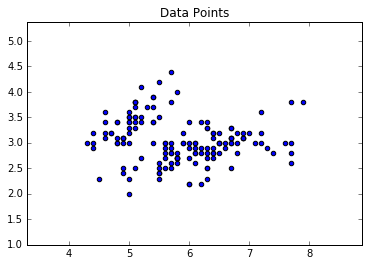

In [49]:
plt.figure()
plt.scatter(X[:,0], X[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data Points")
plt.show()

In [50]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

In [51]:
clf = neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [52]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [54]:
Z

array([1, 1, 1, ..., 2, 2, 2])

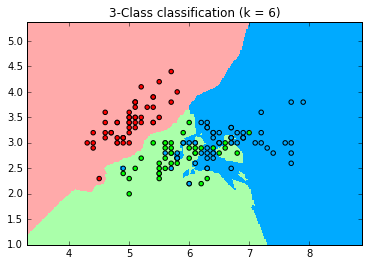

In [57]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"% (6))
plt.show()

In [61]:
s1 = input('Enter sepal length (cm)')
s2 = input('Enter sepal width (cm)')
dataClass = clf.predict([[s1, s2]])
print('Prediction: ')

if dataClass == 0:
    print('Iris Setosa')
elif dataClass == 1:
    print('Iris versicolor')
else:
    print('Iris Virginica')

Enter sepal length (cm)1.4
Enter sepal width (cm)3.3
Prediction: 
Iris Setosa


SVM

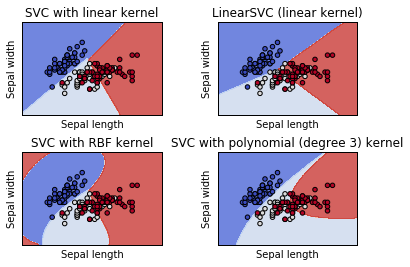

In [66]:
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
h = .02

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha =0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()